In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import plotly.graph_objects as go

In [3]:
#loadng the dataframe
df=pd.read_csv(r"C:\Users\USER\Downloads\website_ab_test.csv")
df.head(5)

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


In [4]:
#checking the amount of null values
df.isnull().sum()

Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64

In [5]:
#checking the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


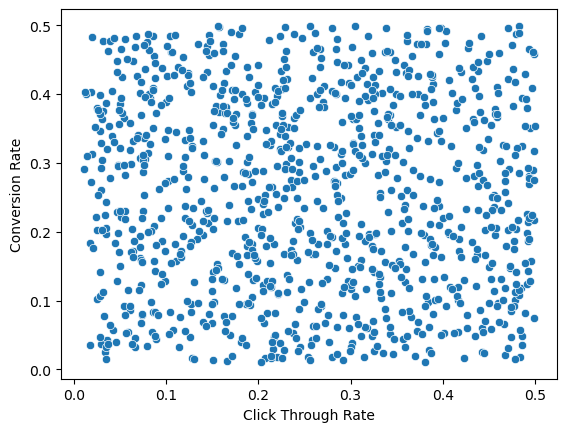

In [7]:
#Relationship between click through rate and coversion rate
sns.scatterplot(data=df, x='Click Through Rate', y='Conversion Rate')
plt.title=('CTR vs COnversion Rate')
plt.show()

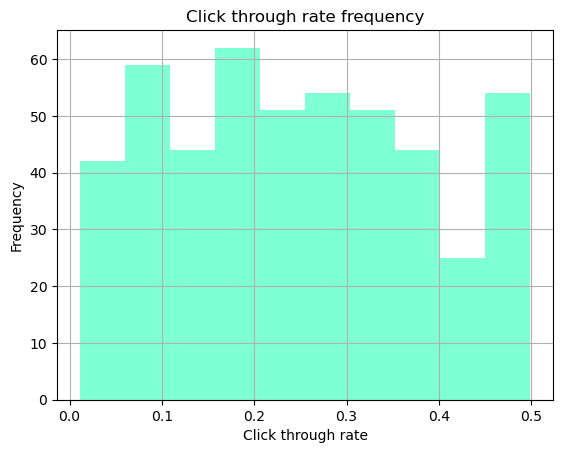

In [6]:
#histogram of clck through rate when in light mode
a=df[df['Theme']=='Light Theme']
a.hist(column='Click Through Rate', color='Aquamarine')
plt.title('Click through rate frequency')
plt.xlabel('Click through rate')
plt.ylabel('Frequency')
plt.show()

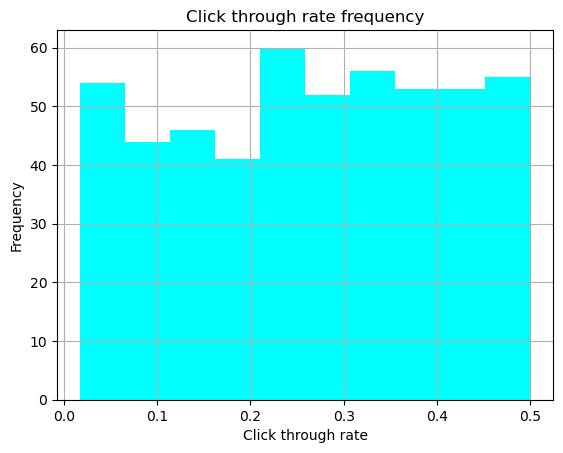

In [7]:
#histogram of clck through rate when in dark mode
b=df[df['Theme']=='Dark Theme']
b.hist(column='Click Through Rate', color='Cyan')
plt.title('Click through rate frequency')
plt.xlabel('Click through rate')
plt.ylabel('Frequency')
plt.show()

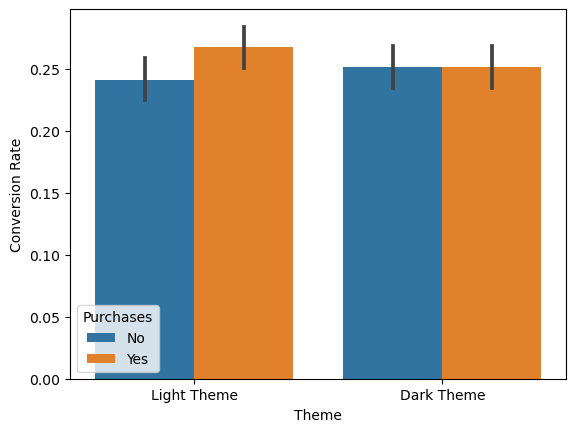

In [11]:
sns.barplot(y='Conversion Rate', x='Theme', data=df, hue='Purchases')
plt.title=('Conversion rate by theme')
plt.xlabel=('Conversion rate')
plt.y6label=('Frequency')
plt.show()

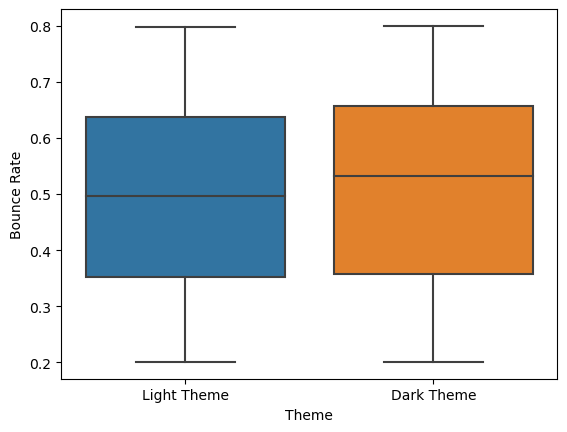

In [9]:
#looking at the bounce rate of both themes
sns.boxplot(data=df, x='Theme',y='Bounce Rate')
plt.show()

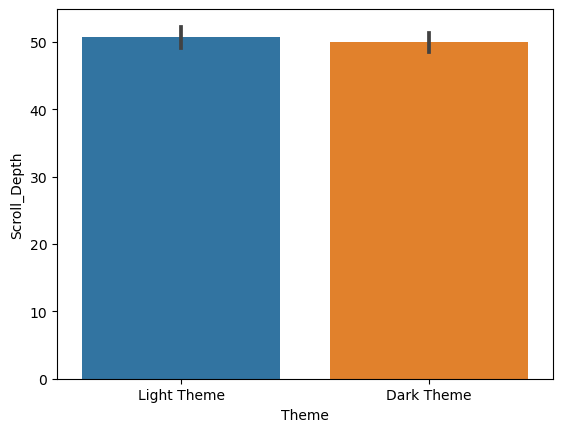

In [10]:
#looking at the scroll depth of both themes
sns.barplot(data=df, x='Theme',y='Scroll_Depth')
plt.show()

# A/B testing

In [11]:
# A/B testing for purchases
Light_theme_conversions=a[a['Purchases']=='Yes'].shape[0]
Light_theme_total=a.shape[0]

Dark_theme_conversions=b[b['Purchases']=="Yes"].shape[0]
Dark_theme_total=b.shape[0]

conversion_counts=[Light_theme_conversions, Dark_theme_conversions]
sample_sizes=[Light_theme_total, Dark_theme_total]

Light_theme_conversion_rate= Light_theme_conversions/Light_theme_total 
Dark_theme_conversion_rate= Dark_theme_conversions/ Dark_theme_total

#2 sample proportion test
zstat, pval = proportions_ztest(conversion_counts, sample_sizes)
print('Light theme conversion rate: ', Light_theme_conversion_rate)
print('Dark theme conversion rate: ', Dark_theme_conversion_rate)
print('A/B testing - z-statistic: ', zstat, 'p-value: ', pval)

Light theme conversion rate:  0.5308641975308642
Dark theme conversion rate:  0.5038910505836576
A/B testing - z-statistic:  0.8531246206222649 p-value:  0.39359019934127804


In [12]:
#Comparison of both themes based on session duration
light_theme_session_duration = a['Session_Duration']
dark_theme_session_duration = b['Session_Duration']

#average session duration for both themes
light_theme_avg_session_duration = light_theme_session_duration.mean()
dark_theme_avg_session_duration = dark_theme_session_duration.mean()

print('Light theme average session duration is: ', light_theme_avg_session_duration)
print('Dark theme average session duration is: ', dark_theme_avg_session_duration)

# 2 sample t-test for session duration
tstat, pval = stats.ttest_ind(light_theme_session_duration, dark_theme_session_duration)
print('A/B Testing for session duration - t-statistic: ', tstat, 'p-value', pval)

Light theme average session duration is:  930.8333333333334
Dark theme average session duration is:  919.4824902723735
A/B Testing for session duration - t-statistic:  0.3528382474155483 p-value 0.7242842138292167
